In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#from wordcloud import WordCloud

In [454]:
df=pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [455]:
df.shape

(8807, 12)

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [457]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [458]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [459]:
df.rename(columns={'listed_in':'genre'},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [460]:
df.drop(columns='show_id',inplace=True)
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [461]:
df.duplicated().sum()

0

In [462]:
df.nunique().sort_values(ascending=False)

title           8807
description     8775
cast            7692
director        4528
date_added      1767
country          748
genre            514
duration         220
release_year      74
rating            17
type               2
dtype: int64

In [463]:
null=df.isna().sum().sort_values(ascending=False)
percent=round(df.isna().mean()*100,2).sort_values(ascending=False)
missing_data=pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','           ',missing_data['Missing Value Count'].sum(),'       ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present 8807
            Missing Value Count  Percentage
director                   2634       29.91
country                     831        9.44
cast                        825        9.37
date_added                   10        0.11
rating                        4        0.05
duration                      3        0.03
Total             4307         48.9


In [464]:
df.dropna(subset=['date_added'],inplace=True)
df['date_added'].isna().sum()

0

In [465]:
df.dropna(subset=['rating'],inplace=True)
df['rating'].isna().sum()

0

In [466]:
df.dropna(subset=['duration'],inplace=True)
df['duration'].isna().sum()

0

In [467]:
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


In [468]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [469]:
df['day']=df['date_added'].dt.day
df['month']=df['date_added'].dt.month_name()
df['year']=df['date_added'].dt.year
df['weekday']=df['date_added'].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,September,2021.0,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,September,2021.0,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,September,2021.0,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,September,2021.0,Friday


In [470]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [471]:
df['rating']=df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'kids')
df['rating']=df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating']=df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating']=df['rating'].replace(['NR','UR'],np.NaN)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,September,2021.0,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,September,2021.0,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,September,2021.0,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,September,2021.0,Friday


In [472]:
df['rating'].unique()

array(['Teens', 'Adults', 'kids', nan], dtype=object)

In [473]:
df['rating'].isna().sum()

82

In [474]:
df.dropna(subset=['rating'],inplace=True)
df['rating'].isna().sum()

0

In [475]:
null=df.isna().sum().sort_values(ascending=False)
percent=round(df.isna().mean()*100,2).sort_values(ascending=False)
missing_data=pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','           ',missing_data['Missing Value Count'].sum(),'       ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present 8708
            Missing Value Count  Percentage
director                   2617       30.05
country                     829        9.52
cast                        808        9.28
date_added                   87        1.00
day                          87        1.00
month                        87        1.00
year                         87        1.00
weekday                      87        1.00
Total             4689         53.85


In [476]:
df[(df['director'].isna()) & (df['country'].isna()) & (df['cast'].isna())].shape[0]

96

In [477]:
df.shape

(8708, 15)

In [478]:
df.dropna(subset=['director','country','cast'],how='all',inplace=True)
df.shape

(8612, 15)

In [479]:
df_cast=pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_cast=df_cast.stack()
df_cast=pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)                                                                # inplace=True
df_cast=df_cast[['title',0]]                                                                # double [[]]
df_cast.columns=['title','cast']
df_cast.replace('nan',np.NaN,inplace=True)                                                # explain
df_cast.isna().sum()

title      0
cast     712
dtype: int64

In [480]:
df_cast

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64246,Zubaan,Manish Chaudhary
64247,Zubaan,Meghna Malik
64248,Zubaan,Malkeet Rauni
64249,Zubaan,Anita Shabdish


In [481]:
df_genre=pd.DataFrame(df['genre'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_genre=df_genre.stack()
df_genre=pd.DataFrame(df_genre)
df_genre.reset_index(inplace=True)
df_genre=df_genre[['title',0]]
df_genre.columns=['title','genre']
df_genre.replace('nan',np.NaN,inplace=True)
df_genre.isna().sum()

title    0
genre    0
dtype: int64

In [482]:
df_genre

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
18932,Zoom,Children & Family Movies
18933,Zoom,Comedies
18934,Zubaan,Dramas
18935,Zubaan,International Movies


In [483]:
df_director=pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_director=df_director.stack()
df_director=pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director=df_director[['title',0]]
df_director.columns=['title','director']
df_director.replace('nan',np.NaN,inplace=True)
df_director.isna().sum()
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Kota Factory,NaN
4,Midnight Mass,Mike Flanagan
...,...,...
9403,Zinzana,Majid Al Ansari
9404,Zodiac,David Fincher
9405,Zombieland,Ruben Fleischer
9406,Zoom,Peter Hewitt


In [484]:
df['director'].isna().sum()

2521

In [485]:
df_country=pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_country=df_country.stack()
df_country=pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country=df_country[['title',0]]
df_country.columns=['title','country']
df_country.replace('nan',np.NaN,inplace=True)
df_country.isna().sum()
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Kota Factory,India
4,Midnight Mass,NaN
...,...,...
10614,Zinzana,Jordan
10615,Zodiac,United States
10616,Zombieland,United States
10617,Zoom,United States


In [486]:
data12=df_cast.merge(df_genre,on='title')
data12

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
147927,Zubaan,Anita Shabdish,International Movies
147928,Zubaan,Anita Shabdish,Music & Musicals
147929,Zubaan,Chittaranjan Tripathy,Dramas
147930,Zubaan,Chittaranjan Tripathy,International Movies


In [487]:
data123=df_director.merge(data12,on='title')
data123

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
159583,Zubaan,Mozez Singh,Anita Shabdish,International Movies
159584,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
159585,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
159586,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [488]:
data124=df_country.merge(data123,on='title')
data124

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
199945,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
199946,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [489]:
df_new=df.merge(data124,on='title')
df_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,September,2021.0,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199945,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,March,2019.0,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
199946,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,March,2019.0,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,March,2019.0,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,March,2019.0,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [490]:
df_new.drop(columns=['cast_x','country_x','director_x','genre_x'],inplace=True)
df_new.rename(columns={'country_y':'country','director_y':'director','cast_y':'cast','genre_y':'genre'},inplace=True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,September,2021.0,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [491]:
df_new['cast']=df_new['cast'].replace(np.NaN,'Unknown')                            
df_new['country']=df_new['country'].replace(np.NaN,'Unknown')                      
df_new['director']=df_new['director'].replace(np.NaN,'Unknown')             

In [492]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,September,2021.0,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [493]:
df_new.drop_duplicates(keep='first',inplace=True)

In [494]:
df_new.shape

(199895, 15)

In [495]:
df_movies=df_new.loc[df_new['type']=='Movie']
df_tvs=df_new.loc[df_new['type']=='TV Show']

In [512]:
df_movies.shape

(144240, 15)

In [497]:
df_tvs.shape

(55655, 15)

In [498]:
df_movies['duration'].unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

In [499]:
df_movies['duration']=df_movies['duration'].str.replace('min',"")
df_movies.head()

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6452\1265926053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration']=df_movies['duration'].str.replace('min',"")


,type,title,date_added,release_year,rating,duration,description,day,month,year,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25.0,September,2021.0,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,September,2021.0,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,September,2021.0,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,September,2021.0,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,September,2021.0,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [500]:
df_tvs['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [501]:
df_tvs['duration']=df_tvs['duration'].str.replace('Seasons',"")
df_tvs['duration']=df_tvs['duration'].str.replace('Season',"")
df_tvs.head()

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6452\61632933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration']=df_tvs['duration'].str.replace('Seasons',"")
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6452\61632933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration']=df_tvs['duration'].str.replace('Season',"")


,type,title,date_added,release_year,rating,duration,description,day,month,year,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


In [502]:
df_tvs.rename(columns={'duration':'seasons'},inplace=True)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6452\3221938497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs.rename(columns={'duration':'seasons'},inplace=True)


In [503]:
df_tvs.head()

,type,title,date_added,release_year,rating,seasons,description,day,month,year,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,September,2021.0,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


In [504]:
print(df['year'].min())
print(df['year'].max())

2008.0
2021.0


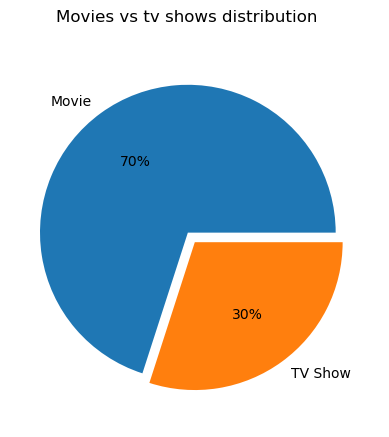

<Figure size 640x480 with 0 Axes>

In [505]:
labels=['Movie','TV Show']
plt.pie(df.groupby('type')['type'].count(),labels=labels,explode=(0.08,0),autopct='%0.0f%%')
plt.suptitle('Movies vs tv shows distribution')
plt.show()
plt.savefig('1.png')

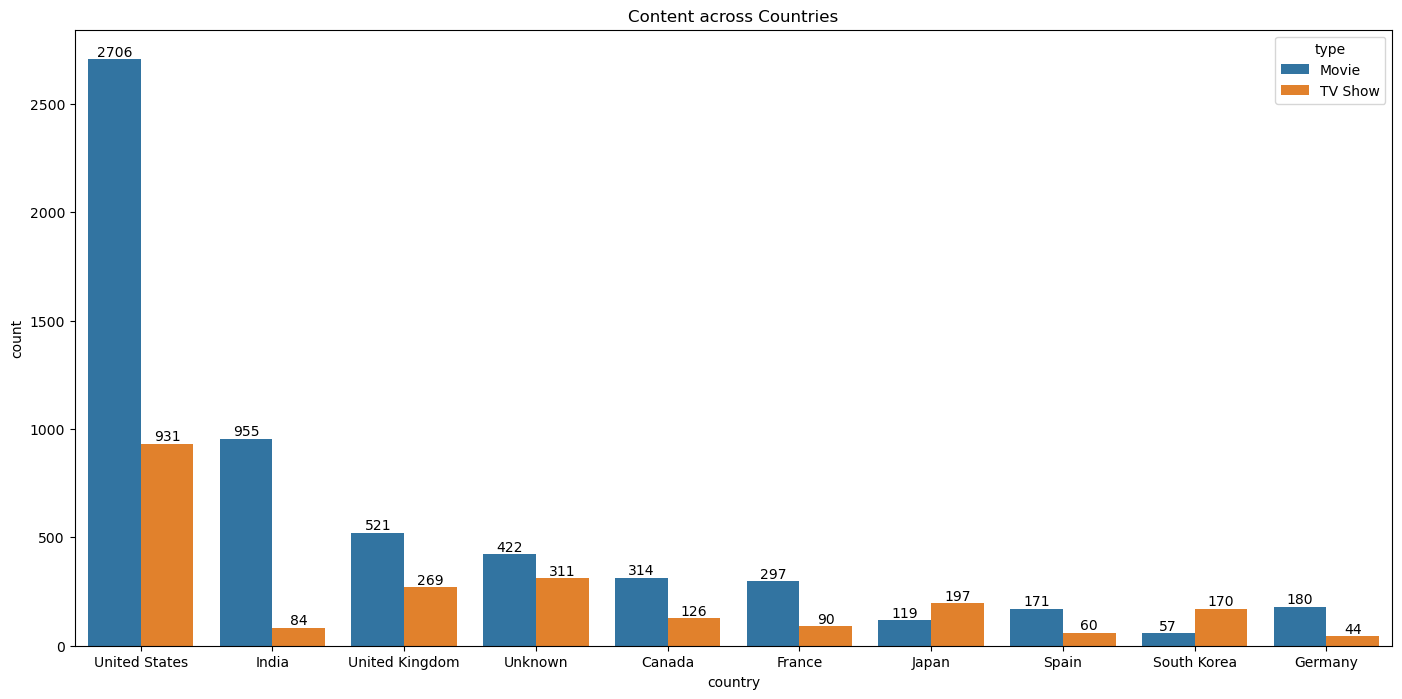

<Figure size 640x480 with 0 Axes>

In [506]:
df_temp=df_new.drop_duplicates(subset=['country','title'])
x=df_temp['country'].value_counts().head(10)
plt.figure(figsize=(17,8))
plt.title('Content across Countries')
label=sns.countplot(data=df_temp,x='country',hue='type',order=x.index)
for i in label.containers:
    label.bar_label(i)
plt.show()
plt.savefig("2.jpg")

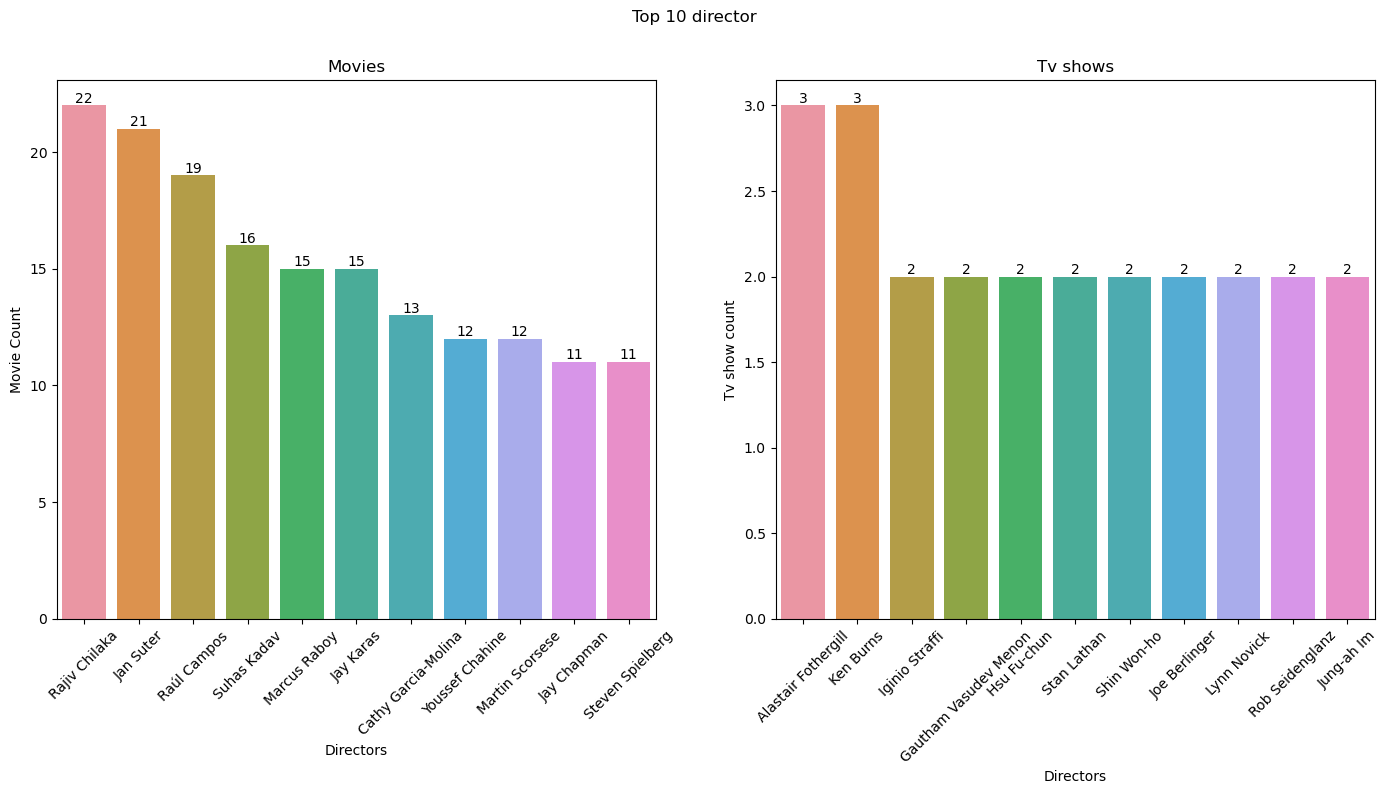

In [507]:
df_movies_temp=df_movies.drop_duplicates(subset=['director','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['director','title'])
plt.figure(figsize=(17,7))
plt.suptitle('Top 10 director')
plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp,x='director',order=df_movies_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title('Movies')
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label=sns.countplot(data=df_tvs_temp,x='director',order=df_tvs_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title('Tv shows')
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('Tv show count')
plt.show()

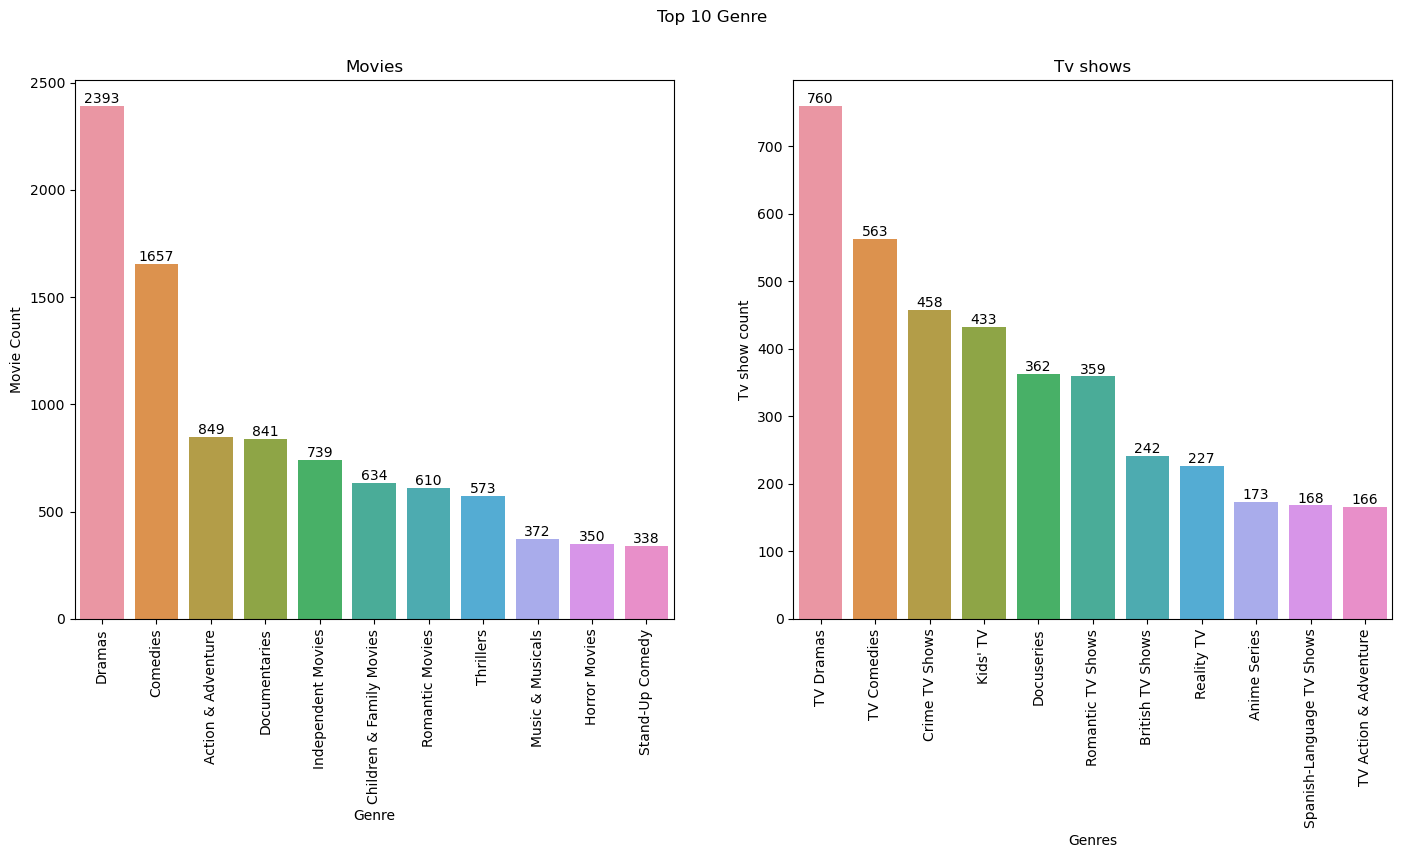

In [508]:
df_movies_temp=df_movies.drop_duplicates(subset=['genre','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['genre','title'])
plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Genre')
plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp,x='genre',order=df_movies_temp['genre'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title('Movies')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label=sns.countplot(data=df_tvs_temp,x='genre',order=df_tvs_temp['genre'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title('Tv shows')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Tv show count')
plt.show()

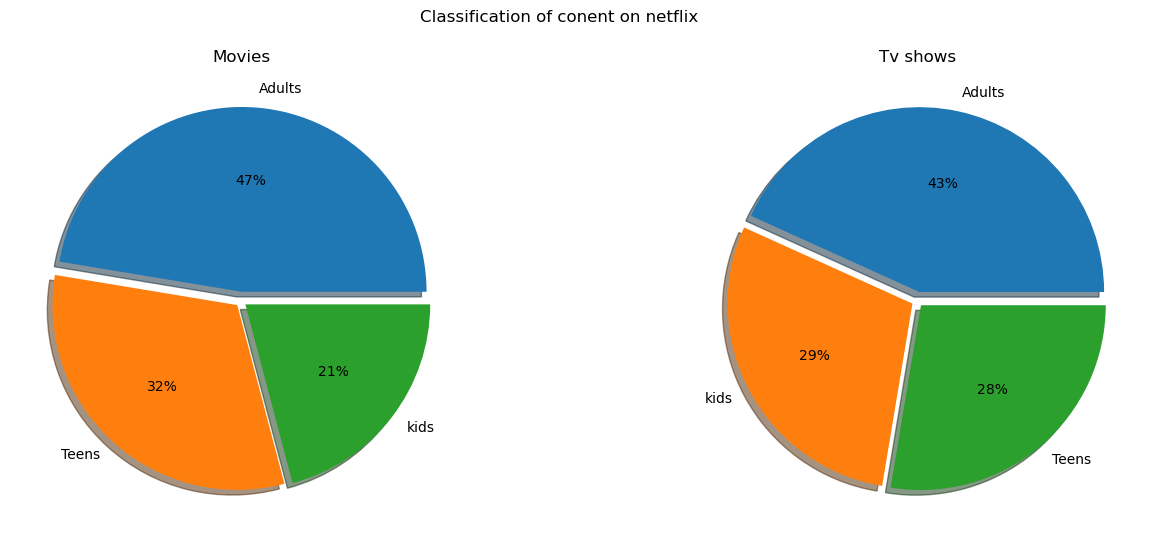

In [509]:
df_movies_temp=df_movies.drop_duplicates(subset=['rating','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['rating','title'])
plt.figure(figsize=(16,6))
plt.suptitle('Classification of conent on netflix')
plt.subplot(1,2,1)
plt.pie(df_movies_temp['rating'].value_counts(),labels=df_movies_temp['rating'].value_counts().index,
        autopct='%.0f%%',
       explode=(0.05,0.03,0.03),shadow=True)
plt.title('Movies')

plt.subplot(1,2,2)
plt.pie(df_tvs_temp['rating'].value_counts(),labels=df_tvs_temp['rating'].value_counts().index,
       autopct='%.0f%%',explode=(0.05,0.03,0.03),shadow=True)
plt.title('Tv shows')
plt.show()

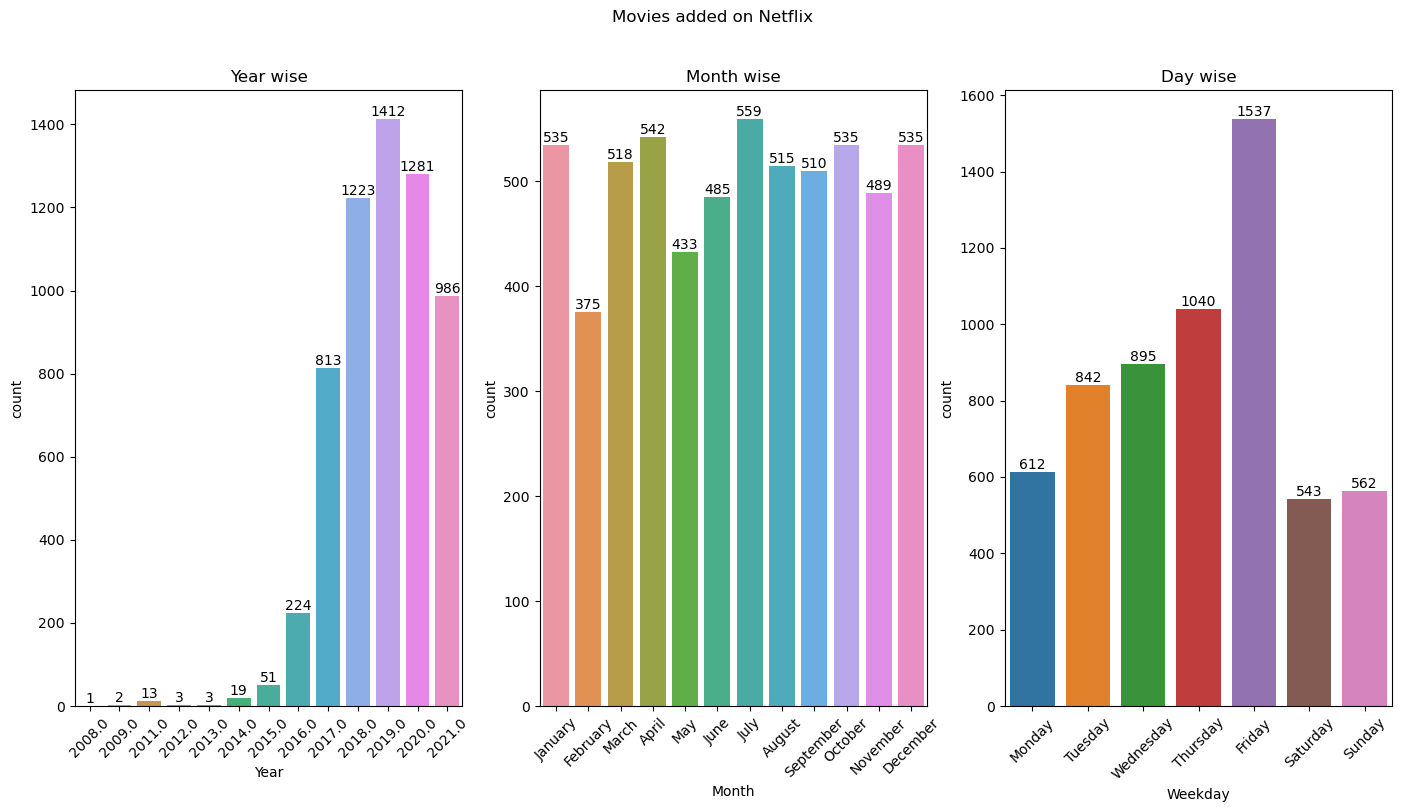

In [510]:
df_movies_temp = df_movies.drop_duplicates(subset = ['year','title'])


mv_year = df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
mv_month = df_movies_temp['month'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_movies_temp['weekday'].value_counts().loc[day_order]

plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_movies_temp, x='year', order = mv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_movies_temp, x='month', order = mv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_movies_temp, x='weekday', order = mv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')

plt.show()

C:\Users\Abhishek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abhishek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


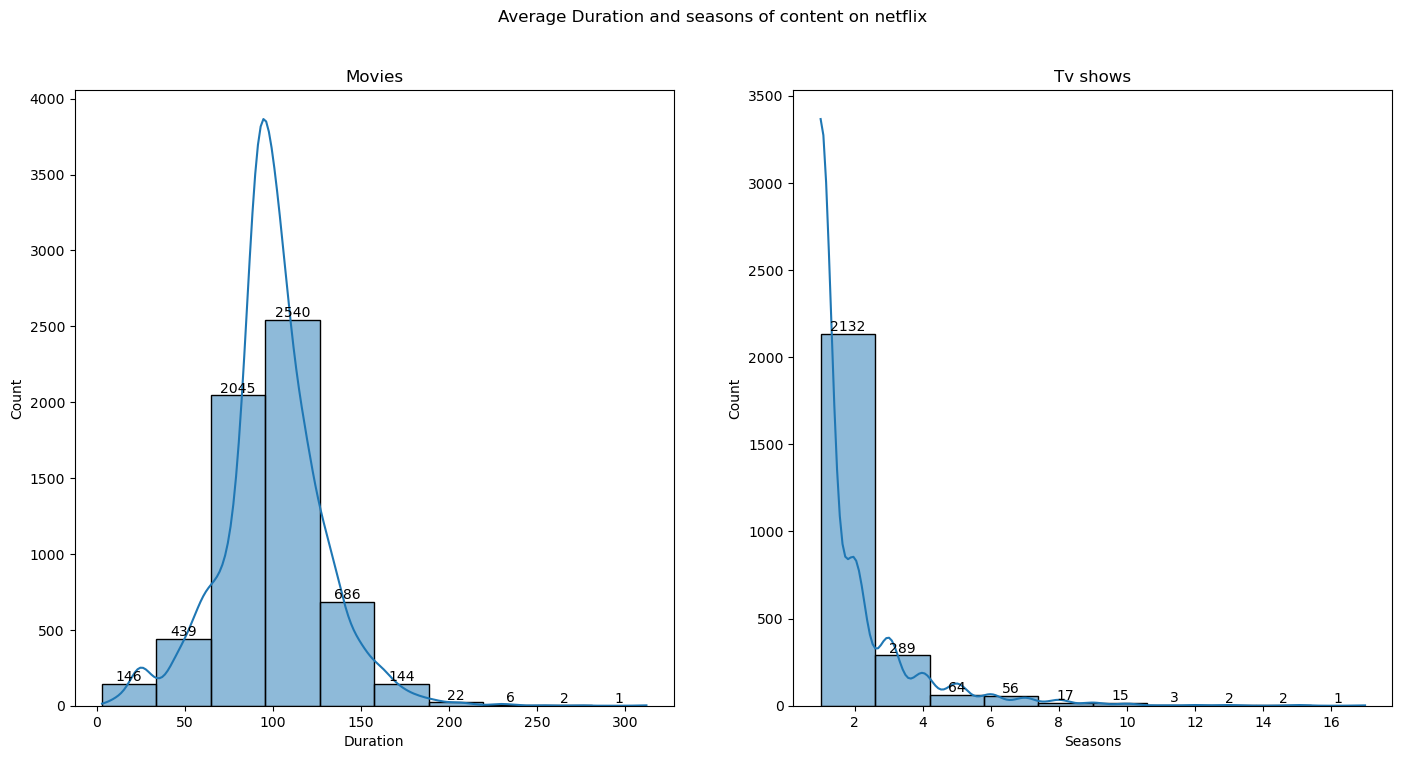

In [514]:
df_movies_temp=df_movies.drop_duplicates(subset=['duration','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['seasons','title'])

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and seasons of content on netflix')

plt.subplot(1,2,1)
label=sns.histplot(df_movies_temp['duration'].astype(int),bins=10,kde=True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Duration')
plt.title('Movies')

plt.subplot(1,2,2)
label=sns.histplot(df_tvs_temp['seasons'].astype(int),bins=10,kde=True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Seasons')
plt.title('Tv shows')
plt.show()


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6452\2897936510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_temp['duration']=df_movies_temp['duration'].astype(int)
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6452\2897936510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs_temp['seasons']=df_tvs_temp['seasons'].astype(int)


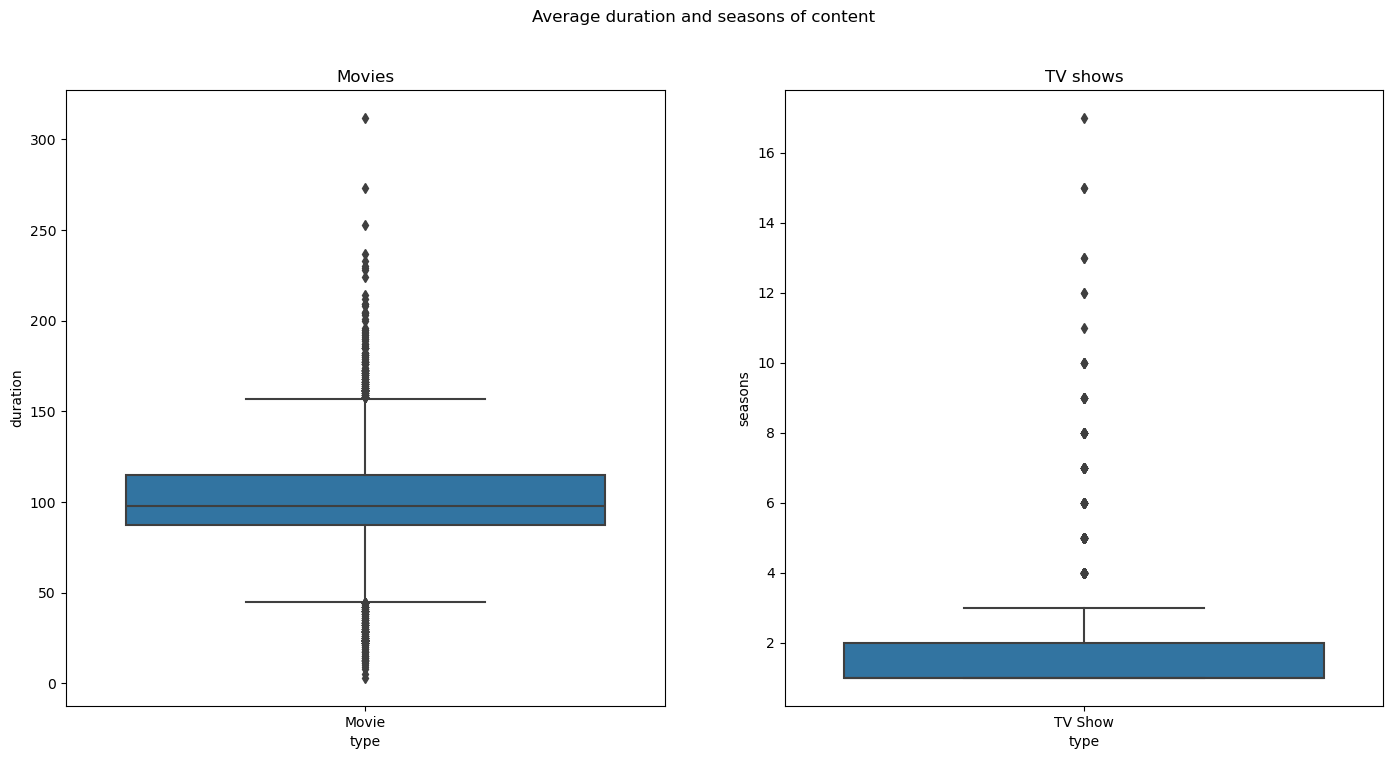

In [515]:
df_movies_temp['duration']=df_movies_temp['duration'].astype(int)
df_tvs_temp['seasons']=df_tvs_temp['seasons'].astype(int)

plt.figure(figsize=(17,8))
plt.suptitle('Average duration and seasons of content')

plt.subplot(1,2,1)
sns.boxplot(df_movies_temp,x='type',y='duration')
plt.title('Movies')

plt.subplot(1,2,2)
sns.boxplot(df_tvs_temp,x='type',y='seasons')
plt.title('TV shows')
plt.show()

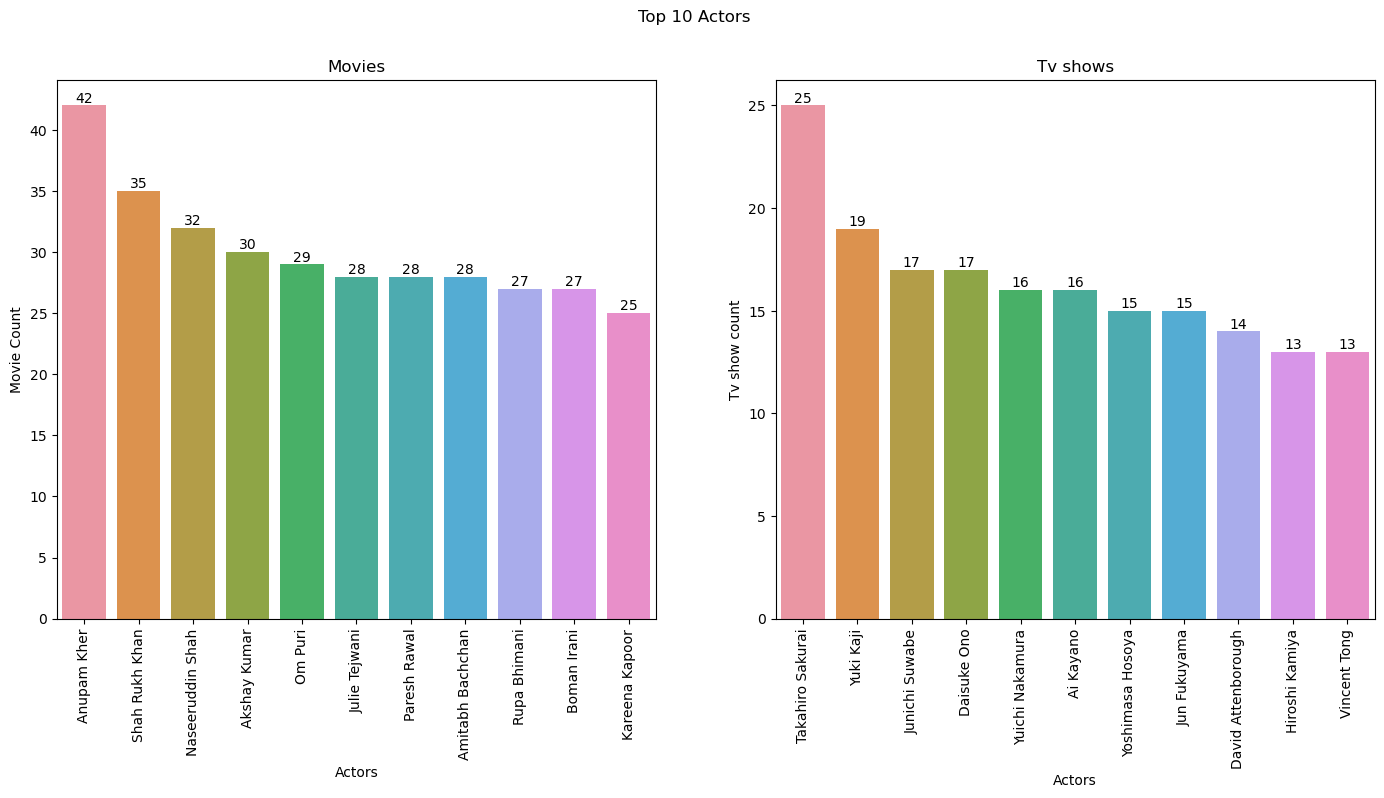

In [517]:
df_movies_temp=df_movies.drop_duplicates(subset=['cast','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['cast','title'])
plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Actors')
plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp,x='cast',order=df_movies_temp['cast'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title('Movies')
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label=sns.countplot(data=df_tvs_temp,x='cast',order=df_tvs_temp['cast'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title('Tv shows')
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Tv show count')
plt.show()

In [520]:
#pip install wordcloud
from wordcloud import WordCloud 

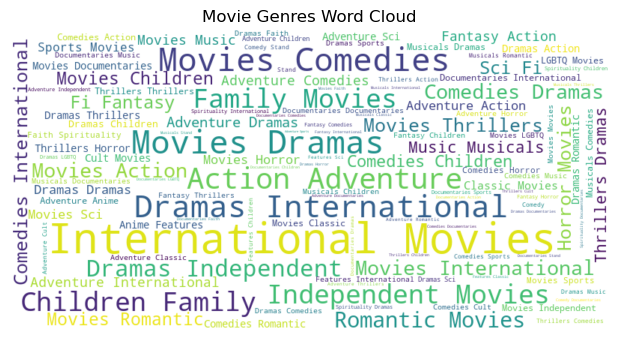

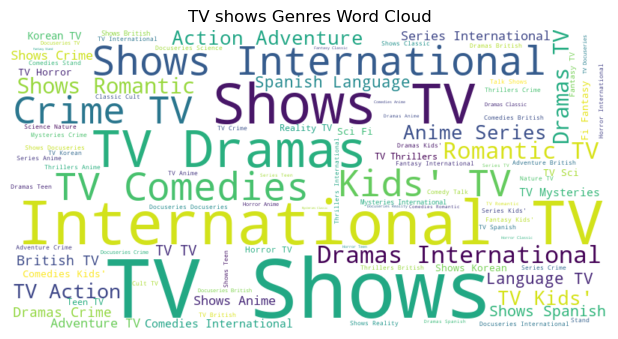

In [531]:
genre_text=" ".join(df_movies['genre'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(genre_text)

plt.figure(figsize=(17,10))
plt.subplot(1,2,1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Movie Genres Word Cloud')
plt.show()
genre_text=" ".join(df_tvs['genre'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(genre_text)

plt.figure(figsize=(17,10))
plt.subplot(1,2,2)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('TV shows Genres Word Cloud')
plt.show()

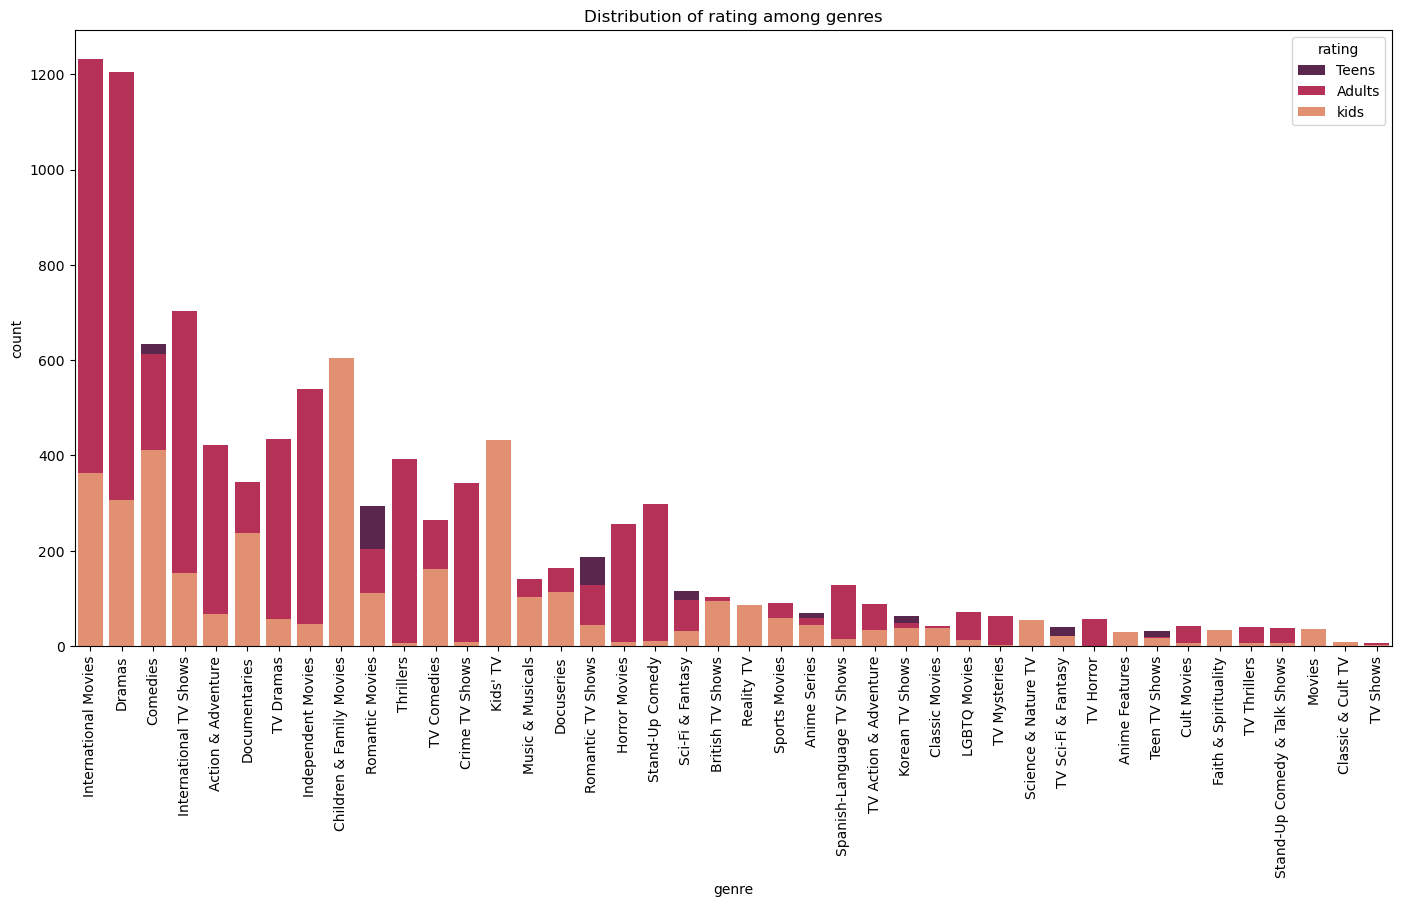

In [540]:
df_temp=df_new.drop_duplicates(subset=['genre','title'])
plt.figure(figsize=(17,8))
plt.title('Distribution of rating among genres')
sns.countplot(data=df_temp,x='genre',hue='rating',dodge=False,order=df_temp['genre'].value_counts().index,palette='rocket')
plt.xticks(rotation=90)
plt.show()

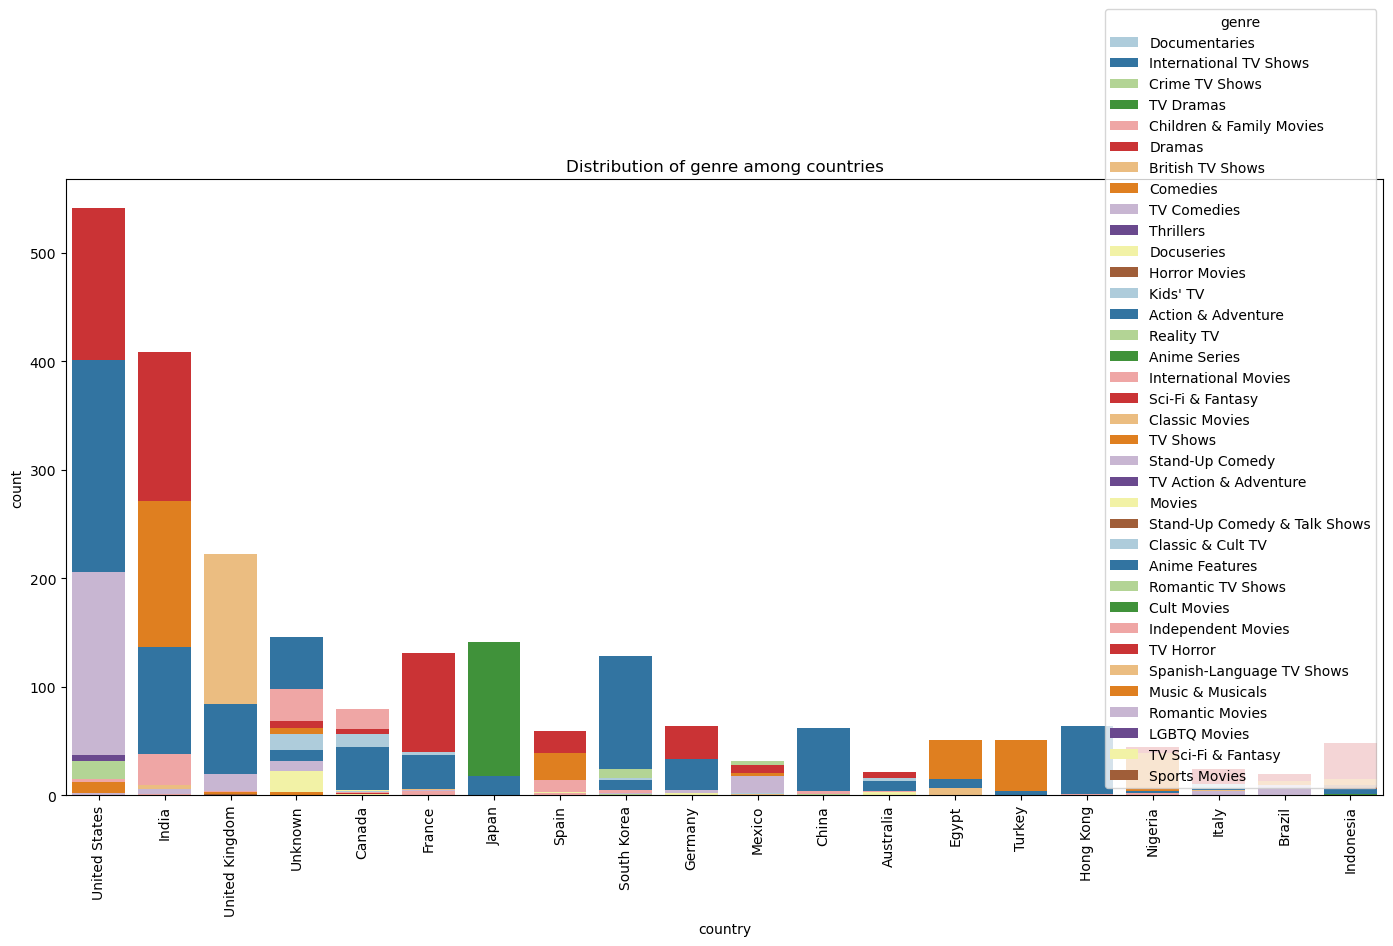

In [539]:
df_temp=df_new.drop_duplicates(subset=['country','title'])
plt.figure(figsize=(17,8))
plt.title('Distribution of genre among countries')
sns.countplot(data=df_temp,x='country',hue='genre',dodge=False,order=df_temp['country'].value_counts().head(20).index,palette='Paired')
plt.xticks(rotation=90)
plt.show()

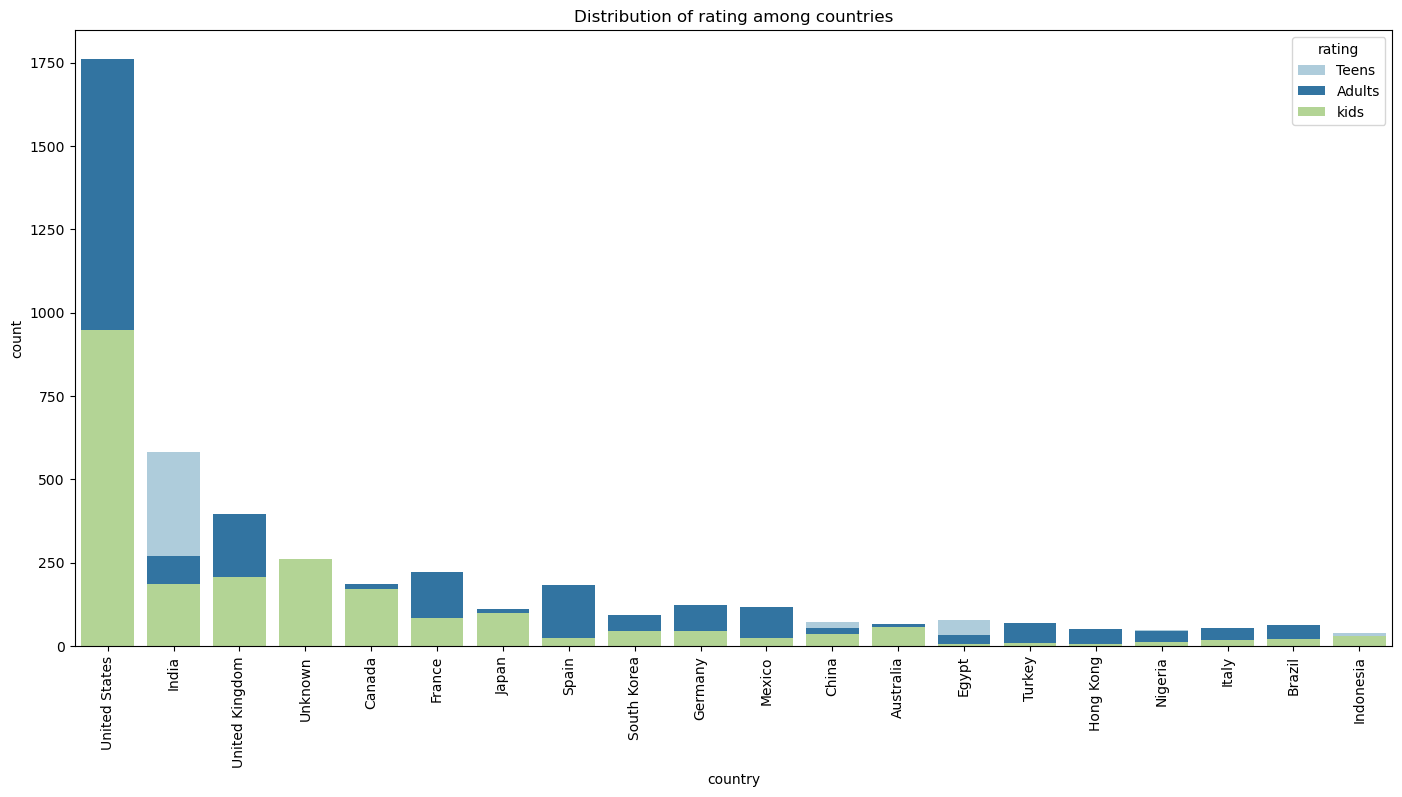

In [542]:
df_temp=df_new.drop_duplicates(subset=['country','title'])
plt.figure(figsize=(17,8))
plt.title('Distribution of rating among countries')
sns.countplot(data=df_temp,x='country',hue='rating',dodge=False,order=df_temp['country'].value_counts().head(20).index,palette='Paired')
plt.xticks(rotation=90)
plt.show()